### 2. 文件读取

In [2]:
cd

C:\Users\xccds


In [5]:
cd "AI_for_Kids/"

C:\Users\xccds\AI_for_Kids


In [7]:
filename = 'data/iris.csv'
f = open(filename)
iris = f.readlines()
f.close()

In [8]:
iris[:6]

['"sepal_length","sepal_width","petal_length","petal_width","species"\n',
 '5.1,3.5,1.4,.2,"Setosa"\n',
 '4.9,3,1.4,.2,"Setosa"\n',
 '4.7,3.2,1.3,.2,"Setosa"\n',
 '4.6,3.1,1.5,.2,"Setosa"\n',
 '5,3.6,1.4,.2,"Setosa"\n']

In [9]:
iris = [line for line in open('data/iris.csv')]

In [10]:
len(iris)

151

In [11]:
iris[:3]

['"sepal_length","sepal_width","petal_length","petal_width","species"\n',
 '5.1,3.5,1.4,.2,"Setosa"\n',
 '4.9,3,1.4,.2,"Setosa"\n']

In [12]:
iris_prec = [line.strip().split(',') for line in iris]

In [13]:
iris_prec[:3]

[['"sepal_length"',
  '"sepal_width"',
  '"petal_length"',
  '"petal_width"',
  '"species"'],
 ['5.1', '3.5', '1.4', '.2', '"Setosa"'],
 ['4.9', '3', '1.4', '.2', '"Setosa"']]

### 3. 一元统计分析

In [14]:
iris_prec_first = [float(line[0]) for line in iris_prec[1:]]

In [15]:
iris_prec_first[:3]

[5.1, 4.9, 4.7]

In [16]:
import numpy as np

In [17]:
iris_one = np.array(iris_prec_first)

In [18]:
iris_one.max()

7.9

In [19]:
iris_one.min()

4.3

In [20]:
iris_one.mean()

5.843333333333334

In [21]:
iris_one.std()

0.8253012917851409

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt 

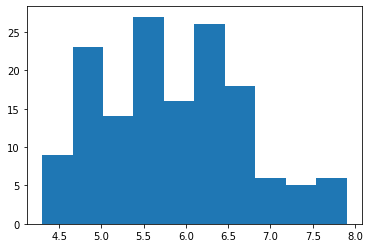

In [23]:
plt.hist(iris_one);

In [24]:
import pandas as pd

In [25]:
iris = pd.read_csv(filename)

In [26]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [27]:
type(iris)

pandas.core.frame.DataFrame

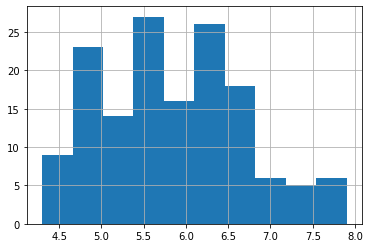

In [28]:
iris.sepal_length.hist();

In [29]:
iris.sepal_length.max()

7.9

In [30]:
iris.sepal_length.min()

4.3

In [31]:
iris.sepal_length.mean()

5.843333333333335

In [32]:
iris.sepal_length.std()

0.8280661279778629

In [34]:
iris.mean()

C:\Users\xccds\AppData\Local\Temp\ipykernel_2140\935066809.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  iris.mean()


sepal_length    5.843333
sepal_width     3.057333
petal_length    3.758000
petal_width     1.199333
dtype: float64

In [35]:
iris.groupby('species').mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
Setosa,5.006,3.428,1.462,0.246
Versicolor,5.936,2.770,4.260,1.326
Virginica,6.588,2.974,5.552,2.026


In [36]:
iris.groupby('species')['sepal_length'].mean()

species
Setosa        5.006
Versicolor    5.936
Virginica     6.588
Name: sepal_length, dtype: float64

### 4. 二元统计分析

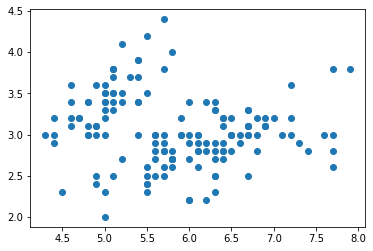

In [37]:
plt.scatter(iris.sepal_length, iris.sepal_width);

In [38]:
np.corrcoef(iris.sepal_length, iris.sepal_width)

array([[ 1.        , -0.11756978],
       [-0.11756978,  1.        ]])

In [39]:
iris.groupby('species').apply(lambda x: np.corrcoef(x.sepal_length, x.sepal_width)[0,1])

species
Setosa        0.742547
Versicolor    0.525911
Virginica     0.457228
dtype: float64

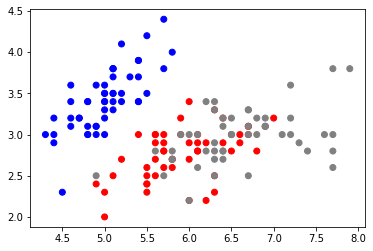

In [40]:
color_list = ['blue']*50 + ['red']*50+ ['grey']*50
plt.scatter(iris.sepal_length, iris.sepal_width,color=color_list);

###  练习：

In [41]:
def corrcoef(x,y):
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    cov = np.mean((x-x_mean)*(y-y_mean))
    output = cov/(np.std(x)*np.std(y))
    return output

In [42]:
corrcoef(iris.sepal_length, iris.sepal_width)

-0.11756978413300205

In [43]:
import pandas as pd

In [44]:
weight_height = pd.read_csv("data/weight-height.csv")

In [45]:
weight_height.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [54]:
weight_height[['Height','Weight']].mean()

Height     66.367560
Weight    161.440357
dtype: float64

In [47]:
weight_height.groupby('Gender').mean()

,Height,Weight
Gender,,
Female,63.708774,135.860093
Male,69.026346,187.020621


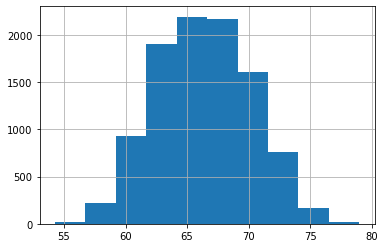

In [48]:
weight_height.Height.hist();

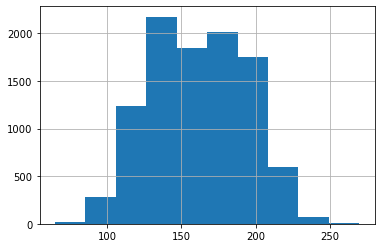

In [49]:
weight_height.Weight.hist();

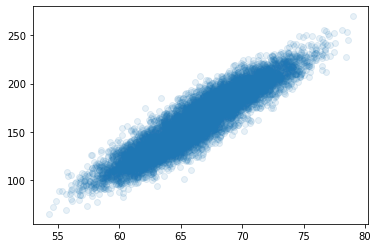

In [50]:
plt.scatter(weight_height.Height,weight_height.Weight,alpha=0.1);